## データの説明

https://signate.jp/competitions/266/data

In [28]:
library(tidyverse)

private_rooms <- read.csv("data/01_train_民泊サービスの宿泊価格予測.csv")
# View(private_rooms)
head(private_rooms)

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,⋯,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking on premises"",Washer,Dryer,""Smoke detector""}",2,Real Bed,1,4,flexible,LA,t,⋯,-118.15476,The Penthouse,,1,Apartment,60,Private room,,90804,138
2,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",1,Real Bed,1,1,strict,DC,t,⋯,-76.97819,Guest Bedroom in Brookland,Brookland,9,House,100,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-623c-4b5d-8186-f4f855d66cf2.jpg?aki_policy=small,20018,42
3,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indoor fireplace"",""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50"",""Self Check-In"",Keypad,Lockbox,Bathtub,""Room-darkening shades""}",2,Real Bed,1,1,strict,NYC,t,⋯,-73.92624,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-da1c-4030-86b4-d8c43f3c6c2d.jpg?aki_policy=small,,65
4,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",Essentials,Shampoo,""Self Check-In"",Keypad}",1,Real Bed,1,1,strict,SF,t,⋯,-122.41191,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95,Private room,,94133,166
5,4,2,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,Elevator,""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer""}",1,Real Bed,1,1,strict,NYC,t,⋯,-73.97469,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5027d0c4_original.jpg?aki_policy=small,10024,165
6,5,2,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Smoke detector"",Essentials,Hangers,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_49""}",1,Real Bed,1,1,flexible,NYC,t,⋯,-74.01573,"Close NYU Langone H, Room A/3min to Subway",Sunset Park,7,House,94,Private room,https://a0.muscache.com/im/pictures/dd071463-3288-4443-9ce1-52b7bf7dc525.jpg?aki_policy=small,11220,55


In [29]:
summary(private_rooms)

       id         accommodates     amenities           bathrooms    
 Min.   :    0   Min.   : 1.000   Length:55583       Min.   :0.000  
 1st Qu.:13896   1st Qu.: 2.000   Class :character   1st Qu.:1.000  
 Median :27791   Median : 2.000   Mode  :character   Median :1.000  
 Mean   :27791   Mean   : 3.153                      Mean   :1.236  
 3rd Qu.:41686   3rd Qu.: 4.000                      3rd Qu.:1.000  
 Max.   :55582   Max.   :16.000                      Max.   :8.000  
                                                     NA's   :147    
   bed_type            bedrooms           beds        cancellation_policy
 Length:55583       Min.   : 0.000   Min.   : 0.000   Length:55583       
 Class :character   1st Qu.: 1.000   1st Qu.: 1.000   Class :character   
 Mode  :character   Median : 1.000   Median : 1.000   Mode  :character   
                    Mean   : 1.265   Mean   : 1.712                      
                    3rd Qu.: 1.000   3rd Qu.: 2.000                      
    

---
## 収納可能な人数の分布

histogram

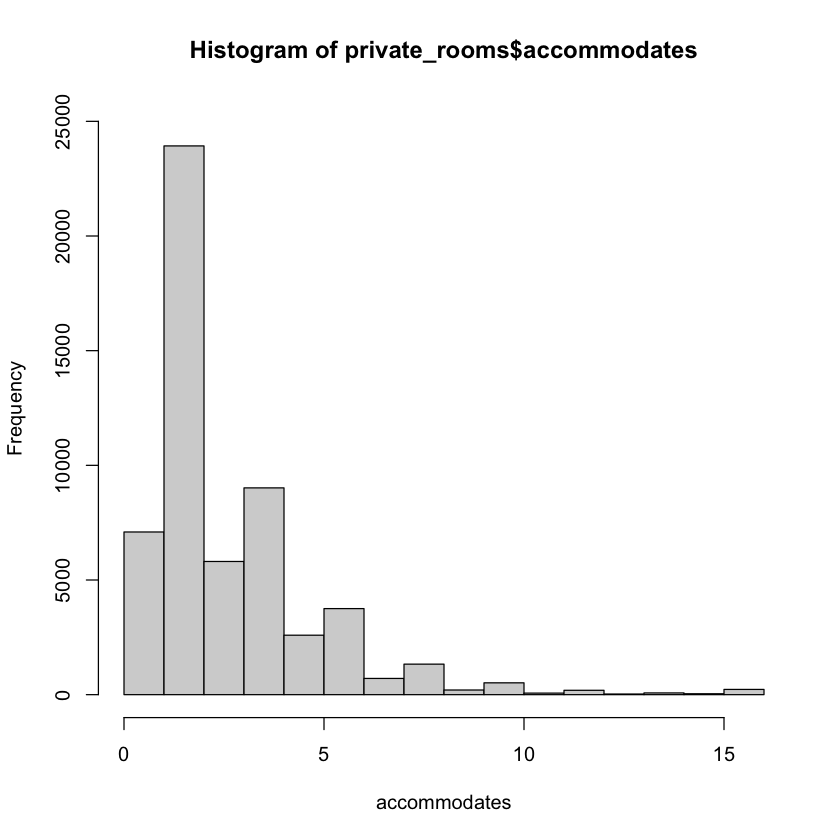

In [64]:
hist(private_rooms$accommodates, 
     xlab="accommodates",
     breaks=seq(0,16,1),
     ylim=c(0,25000),
    )

---
## 16人収納できる家の数

最後のnrow()関数で16人収納できる家の数をカウントする

nrow()関数の説明　

https://www.statology.org/number-of-rows-in-r/

In [94]:
private_rooms %>% 
    select(accommodates) %>% 
    filter(accommodates == 16) %>% 
    summarise(n()) # この業はあるいは nrow()を使う


n()
<int>
229


---

## bathrooms個数の分布

In [105]:
# bathrommにどんな値が入っているかをチェック
sort(unique(private_rooms$bathrooms))

[1] 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5 7.0 7.5 8.0

In [117]:
# bathroom 0個の家は 156個
# bathroom 1個の家は 43469個
private_rooms %>% 
    select(bathrooms) %>% 
    # filter(bathrooms == 0 | bathrooms == 1) %>%
    group_by(bathrooms) %>%
    summarise(n())
    # nrow()

bathrooms,n()
<dbl>,<int>
0.0,156
0.5,154
1.0,43469
1.5,2875
2.0,6042
2.5,1186
3.0,793
3.5,308
4.0,223


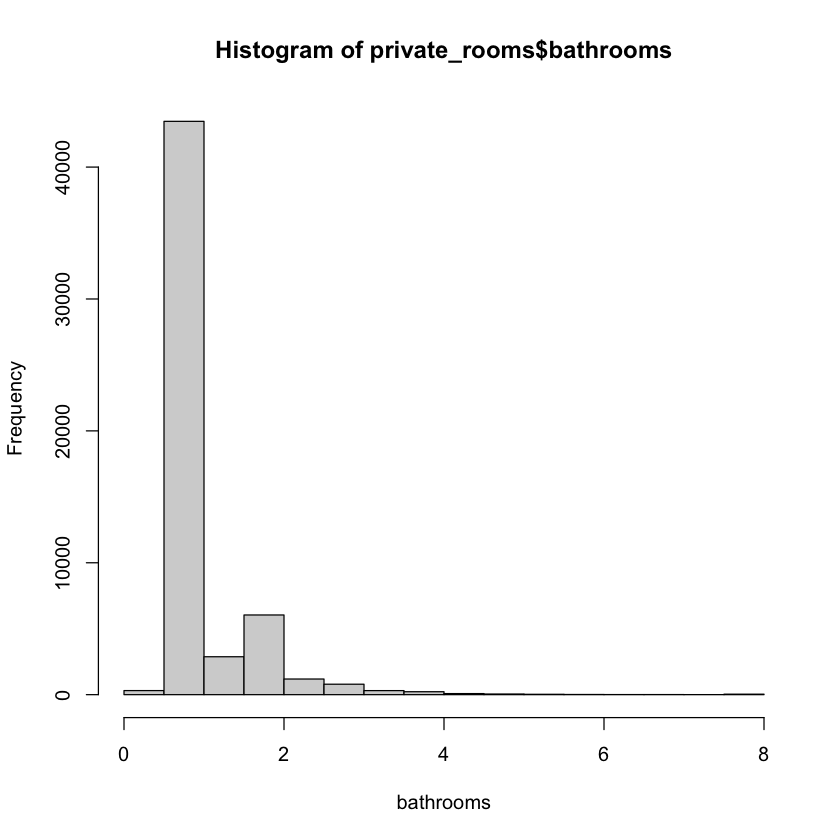

In [128]:
hist(private_rooms$bathrooms, 
     xlab="bathrooms",
    )